In [24]:
import pandas as pd

# 1. 데이터셋 생성하기

# s_data = pd.read_csv('C:/Users/AWST_DEOCK/keras/sampledata/1.csv')

# print(s_data)

# for i in range(1,6) :
    
    s_data = pd.read_csv('C:/Users/AWST_DEOCK/keras/sampledata/1.csv')
        
    
# # signal_data = np.cos(np.arange(1600)*(20*np.pi/1000))[:,None]

# ================================================Dictionary handle=============================================================
# # data.keys() # key 전체 보기 
# # list(data.keys()) #key를 list로 변환
# # data.values() # Values 전체 보기 
# # list(data.values()) #Values 를 list로 변환
# # data.items() # key, Value를 쌍으로 얻기 (튜플로 돌려줌)
# # a = data.get('1') # key로 value 얻기, 변수 저장하기
# # '1000' in data  #  해당 key가 딕셔너리 안에 있는지 조사하기 (in)
# ==============================================================================================================================

    
# Train_axis = Train_set[0]
# Train_axis = Train_axis[['LOSL']]

# a_axis_train = a[['x','y','z']]
# a_label_train = a[['LOSL']]

# b_axis_val = b[['x','y','z']]
# b_label_val = b[['LOSL']]

# c_axis_test = c[['x','y','z']]
# c_label_test = c[['LOSL']]



SyntaxError: can't assign to function call (<ipython-input-24-098c085a00aa>, line 11)

In [ ]:
from os import listdir
from os.path import isfile, join
from IPython.display import display
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt
from tensorflow.python.keras.callbacks import TensorBoard
from time import time
from keras import layers
from keras import models 
import keras

%matplotlib inline


# 사용자 정의 히스토리 클래스 정의
class CustomHistory(keras.callbacks.Callback):
    def init(self):
        self.train_loss = []
        self.val_loss = []
        self.train_acc = []
        self.val_acc = []        
        
    def on_epoch_end(self, batch, logs={}):
        self.train_loss.append(logs.get('loss'))
        self.val_loss.append(logs.get('val_loss'))
        self.train_acc.append(logs.get('acc'))
        self.val_acc.append(logs.get('val_acc'))
        
        

# 데이터 불러오기 (csv file ->  dataframe as dictionary)

mypath = 'C:/Users/AWST_DEOCK/Desktop/da/sampledata/'
files = [f.split('.')[0] for f in listdir(mypath) if isfile(join(mypath, f))]

Sdata={} # Sdata 는 Dictionary type , 각각의 key에 Pandas DataFrame형태로 Value 저장 

for file in files:
     Sdata[file] = pd.read_csv(mypath+file+'.csv',names=['x','y','z','LOSL']) #provide separator if required
        
                
Sample_data = list(range(1,1001)) # Sample_data 빈 리스트로 생성

for i in range(0,1000):
    Sample_data[i] = Sdata.get(str(i+1)) #Sample_data 리스트에 각각의 Dataframe 저장 
  
# 데이터셋 생성 

Train_set = Sample_data[0:800]
Vali_set = Sample_data[800:900]
Test_set = Sample_data[900:1000]



##############              TRAIN  DATA SET              ##############

#모델 구성하기 
model = Sequential()
model.add(Dense(128,input_dim=1,activation="relu"))
model.add(Dropout(0.3))
for i in range(16):
    model.add(Dense(128,activation="relu"))
    model.add(Dropout(0.3))
model.add(Dense(3))

# 3. 모델 학습과정 설정하기
model.compile(loss='mean_squared_error', optimizer='adam')

tensorboard = TensorBoard(log_dir='C:/Users/AWST_DEOCK/.keras/log'.format(time()))
custom_hist = CustomHistory()
custom_hist.init()

for i in range(0,800):
    
    Train_d = Train_set[i]
    Train_y = Train_d[['x','y','z']]
    Train_x = Train_d[['LOSL']]
    
    # 4. 모델 학습시키기
    
    model.fit(Train_x, Train_y, epochs=20, batch_size=32, callbacks=[tensorboard])

for i in range(0,100):
        
    Test_d = Test_set[i]
    Test_y = Test_d[['x','y','z']]
    Test_x = Test_d[['LOSL']]




#     plt.figure(figsize=(12,5))
#     plt.plot(np.arange(look_ahead),predictions,'r',label="prediction")
#     plt.plot(np.arange(look_ahead),c_label_test[:look_ahead],label="test function")
#     plt.legend()



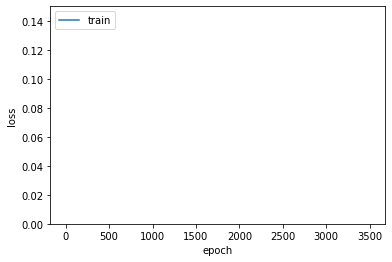

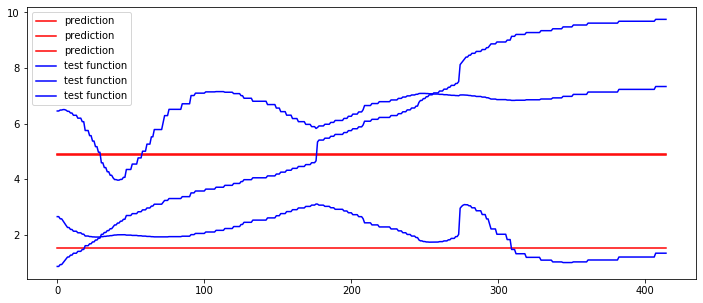

In [302]:

# 5. 학습과정 살펴보기
plt.plot(custom_hist.train_loss)
# plt.plot(custom_hist.val_loss)
plt.ylim(0.0, 0.15)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# # 6. 모델 평가하기
# trainScore = model.evaluate(Train_x, Train_y, batch_size=1, verbose=0)
# model.reset_states()
# print('Train Score: ', trainScore)
# # valScore = model.evaluate(x_val, y_val, batch_size=1, verbose=0)
# # model.reset_states()
# # print('Validataion Score: ', valScore)
# testScore = model.evaluate(x_test, y_test, batch_size=1, verbose=0)
# model.reset_states()
# print('Test Score: ', testScore)

# 7. 모델 사용하기
look_ahead = len(Test_x)
xhat = [Test_x.LOSL[0]]
predictions = np.zeros((look_ahead,3))
for i in range(look_ahead):
    prediction = model.predict(np.array([xhat]), batch_size=1)
    predictions[i] = prediction
    xhat = Test_x.LOSL[i]
#     xhat = np.vstack([xhat[1:],[Test_x.LOSL[i]]])

    
plt.figure(figsize=(12,5))
plt.plot(np.arange(look_ahead),predictions,'r',label="prediction")
plt.plot(np.arange(look_ahead),Test_y[:look_ahead],'b',label="test function")
plt.legend()
plt.show()

451